In [519]:
import numpy as np 
import pandas as pd


In [520]:
df = pd.read_csv('train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [521]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [522]:
sum(df.isnull().sum())

149

In [523]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [524]:
df.nunique()

Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [525]:
df.drop('Loan_ID',inplace=True,axis=1)

In [526]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [527]:
df['Loan_Amount_Term'].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [528]:
pd.crosstab(df['Loan_Amount_Term'],df['Loan_Amount_Term']).sum()

Loan_Amount_Term
12.0       1
36.0       2
60.0       2
84.0       4
120.0      3
180.0     44
240.0      4
300.0     13
360.0    512
480.0     15
dtype: int64

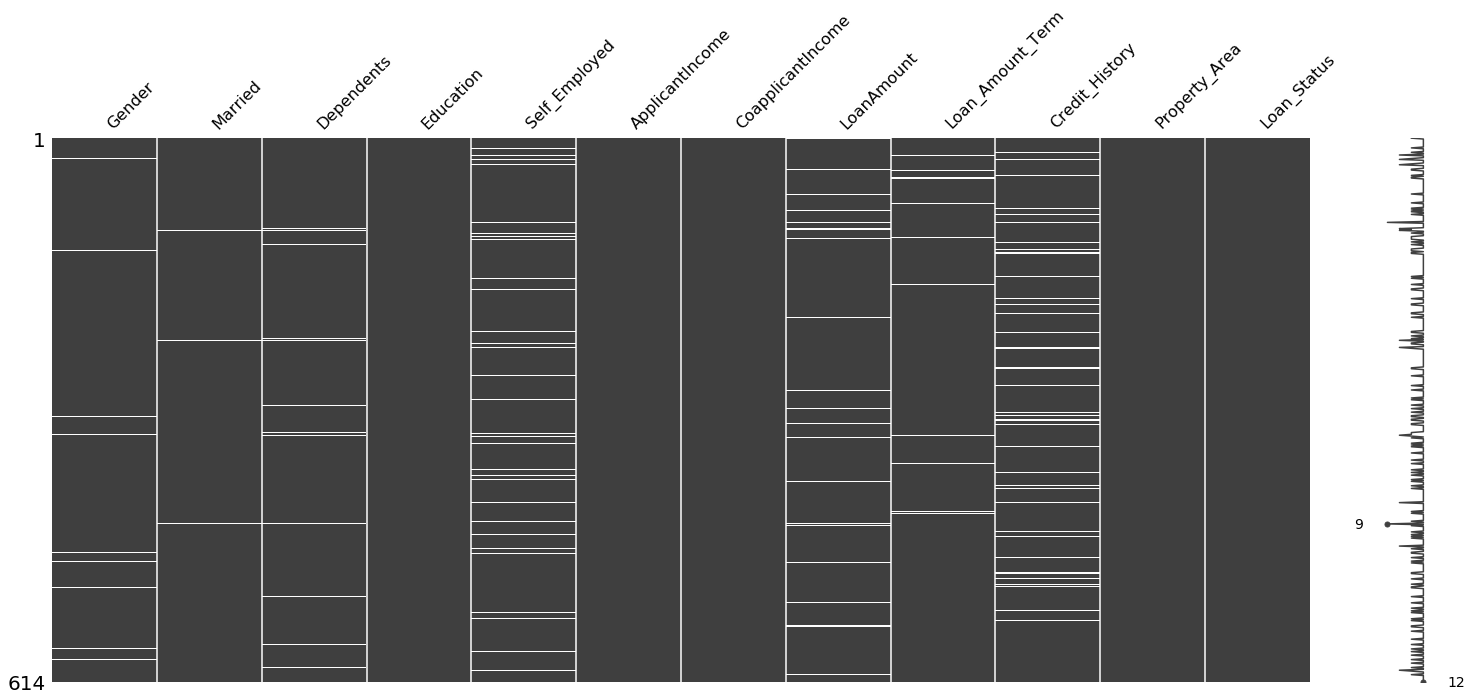

In [529]:
#using missingno
import missingno as msno
msno.matrix(df)

In [530]:
df_NN = df.loc[:,df.isnull().sum()<=0]

In [531]:

c = []
for i in df_NN.columns:
    if df_NN[i].nunique() <10:
        c.append(i)
df_NN=pd.get_dummies(data=df_NN,columns=c)
df_NN.head()

,ApplicantIncome,CoapplicantIncome,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y
0,5849,0.0,1,0,0,0,1,0,1
1,4583,1508.0,1,0,1,0,0,1,0
2,3000,0.0,1,0,0,0,1,0,1
3,2583,2358.0,0,1,0,0,1,0,1
4,6000,0.0,1,0,0,0,1,0,1


In [532]:
df_N = df.loc[:,df.isnull().sum()>0]
nc=df_N.columns

In [533]:
#Replace 
#['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount','Loan_Amount_Term', 'Credit_History']
df_N['Gender'].replace({'Male':int(1),'Female':int(0)},inplace=True)
df_N['Married'].replace({'Yes':int(1),'No':int(0)},inplace=True)
df_N['Dependents'].replace({'0':int(0),'1':int(1),'2':int(2),'3+':int(3)},inplace=True)
df_N['Self_Employed'].replace({'No':int(0),'Yes':int(1)},inplace=True)
df_N['Credit_History'].replace({1.0:int(1),0.0:int(0)},inplace=True)

c:\users\priyasathya\appdata\local\programs\python\python36\lib\site-packages\pandas\core\generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [534]:
for i in nc :
    if df_N[i].nunique() <10:
        print(i)
        print(df_N[i].unique())

Gender
[ 1.  0. nan]
Married
[ 0.  1. nan]
Dependents
[ 0.  1.  2.  3. nan]
Self_Employed
[ 0.  1. nan]
Credit_History
[ 1.  0. nan]


In [535]:
#Importing KNN 
from sklearn.neighbors import KNeighborsClassifier
KNN = KNeighborsClassifier(n_neighbors=5)
#from sklearn.preprocessing import StandardScaler
#scale = StandardScaler()
#scale.fit_transform(df['ApplicantIncome','Credit_History'])

df_t=pd.concat([df_NN,df_N],axis=1)
df_t.head()

,ApplicantIncome,CoapplicantIncome,Education_Graduate,Education_Not Graduate,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_N,Loan_Status_Y,Gender,Married,Dependents,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History
0,5849,0.0,1,0,0,0,1,0,1,1.0,0.0,0.0,0.0,NaN,360.0,1.0
1,4583,1508.0,1,0,1,0,0,1,0,1.0,1.0,1.0,0.0,128.0,360.0,1.0
2,3000,0.0,1,0,0,0,1,0,1,1.0,1.0,0.0,1.0,66.0,360.0,1.0
3,2583,2358.0,0,1,0,0,1,0,1,1.0,1.0,0.0,0.0,120.0,360.0,1.0
4,6000,0.0,1,0,0,0,1,0,1,1.0,0.0,0.0,0.0,141.0,360.0,1.0


In [536]:
#KNN imputation
cols_n=df_t.loc[:,df_t.isnull().sum()>0].columns
cols_nn=df_t.loc[:,df_t.isnull().sum()==0].columns
def KNN_impute_numerical(df_t):
    for i in cols_n:
        x_train = df_t.loc[df_t[i].notnull(),cols_nn]
        y_train = df_t.loc[df[i].notnull(),i]
        x_test = df_t.loc[df_t[i].isnull(),cols_nn]
        KNN.fit(x_train,y_train)
        pred = KNN.predict(x_test)
        df_t.loc[df_t[i].isnull(),i] = pred    
    return df_t

In [537]:
df_complete= KNN_impute_numerical(df_t)

In [538]:
df_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 16 columns):
ApplicantIncome            614 non-null int64
CoapplicantIncome          614 non-null float64
Education_Graduate         614 non-null uint8
Education_Not Graduate     614 non-null uint8
Property_Area_Rural        614 non-null uint8
Property_Area_Semiurban    614 non-null uint8
Property_Area_Urban        614 non-null uint8
Loan_Status_N              614 non-null uint8
Loan_Status_Y              614 non-null uint8
Gender                     614 non-null float64
Married                    614 non-null float64
Dependents                 614 non-null float64
Self_Employed              614 non-null float64
LoanAmount                 614 non-null float64
Loan_Amount_Term           614 non-null float64
Credit_History             614 non-null float64
dtypes: float64(8), int64(1), uint8(7)
memory usage: 47.4 KB


In [541]:
df.loc[:,cols_n] = df_complete.loc[:,cols_n]

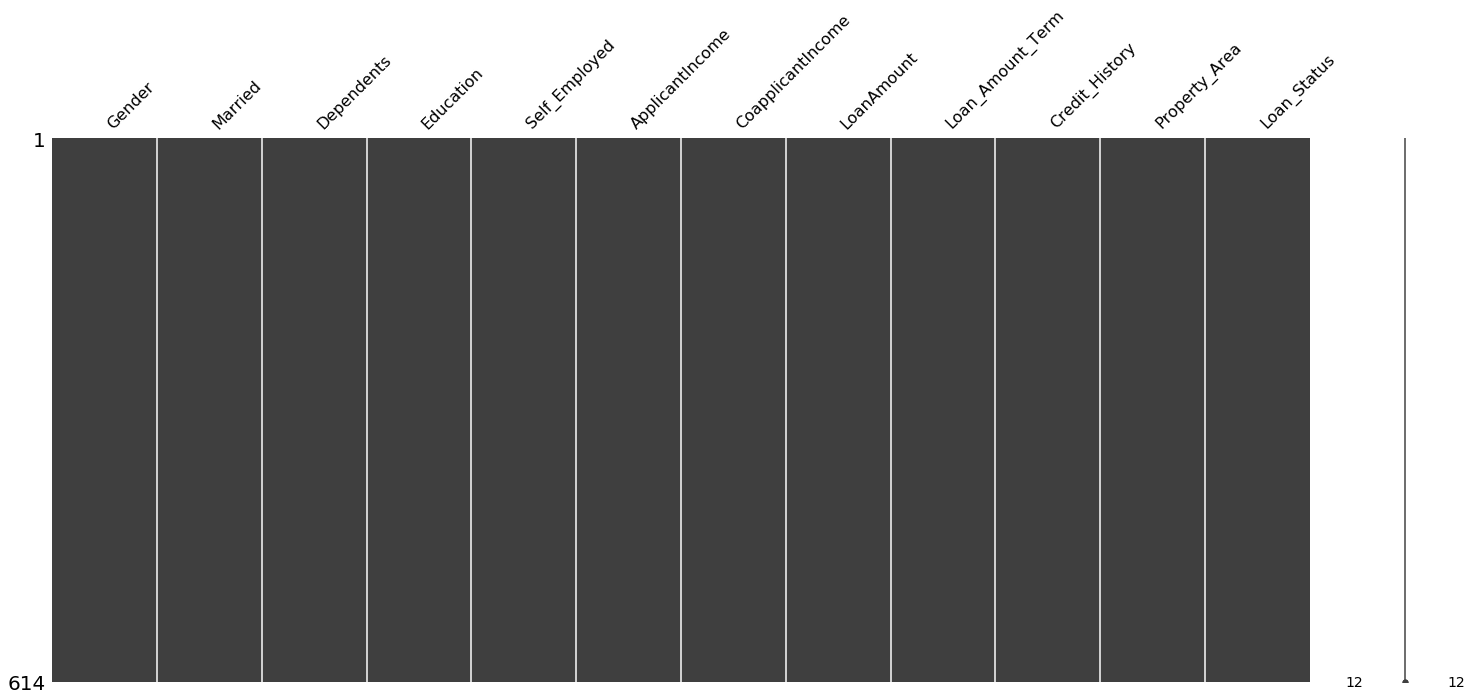

In [542]:
#using missingno
import missingno as msno
msno.matrix(df)

In [543]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1.0,0.0,0.0,Graduate,0.0,5849,0.0,132.0,360.0,1.0,Urban,Y
1,1.0,1.0,1.0,Graduate,0.0,4583,1508.0,128.0,360.0,1.0,Rural,N
2,1.0,1.0,0.0,Graduate,1.0,3000,0.0,66.0,360.0,1.0,Urban,Y
3,1.0,1.0,0.0,Not Graduate,0.0,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,1.0,0.0,0.0,Graduate,0.0,6000,0.0,141.0,360.0,1.0,Urban,Y


In [544]:
df['Gender'].replace({1.0:'Male',0.0:'Female'},inplace=True)
df['Married'].replace({1.0:'Yes',0.0:'No'},inplace=True)
df['Dependents'].replace({0.0:'0',1.0:'1',2.0:'2',3.0:'3+'},inplace=True)
df['Self_Employed'].replace({1.0:'Yes',0.0:'No'},inplace=True)
df['Credit_History'].replace({0.0:'0',1.0:'1'},inplace=True)

In [546]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,132.0,360.0,1,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1,Urban,Y
